# Principal Component Analysis using the Iris dataset
(Following Sebastian Raschka's [tutorial](https://plot.ly/ipython-notebooks/principal-component-analysis/))

Principal component analysis (PCA) is an unsupervised statistical technique, that is used for dimensionality reduction of a dataset. Its main appliance is pattern identification of the data in a dataset. The technique relies on finding the directions which maximize the variance of the data of a $d$-dimensional dataset and projecting them onto a subspace with fewer dimensions, $k$, while trying to keep most of the information.

### Summary of the PCA technique

1. Standardize the data.

2. Obtain the eigenvectors and eigenvalues from the covariance matrix or correlation matrix, or perform Singular-value decomposition.

3. Sort eigenvalues in descending order and choose the $k$ eigenvectors that correspond to the $k$ largest eigenvalues, where $k$ is the number of dimensions of the new feature subspace $(k ≤ d)$.

4. Construct the projection matrix $\mathbf{W}$ from the selected $k$ eigenvectors.

5. Transform the original dataset $\mathbf{X}$ via $\mathbf{W}$ to obtain a $k$-dimensional feature subspace $\mathbf{Y}$.

## 1. Data preparation

### Loading the data

For this demonstration we will use the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris). The set contains flowers of three classes, namely "Iris-setosa", "Iris-versicolor", "Iris-virginica", each having the same number of members (n = 50), and of four features, namely "sepal length", "sepal width", "petal length", "petal width", all measured in cm.

We will use the **pandas** Python library to load the data .

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('iris-dataset.csv', header=None)  # load the dataset
# define the names of the columns of the dataset
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
              'class']
df.head()  # print head of the dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Next, we split the dataset into a matrix $\mathbf{X}$, that contains the features of the flowers, and a vector $y$ containing their respected classes.

In [3]:
X = df.iloc[:, 0:4].values  # columns 0-3  (features)
y = df.iloc[:, 4].values  # column 4 (class)
X[0:5, :]  # show first 5 rows of X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

### Visualization of the data

We can use histograms to get a visual interpretation of the distributions of the 3 classes along the 4 different features of the flowers.

For this we will use the **matplotlib.pyplot.hist()** function to draw histograms for every flower feature.

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # stylesheet to use

In [5]:
# colors of classes
colors = {'Iris-setosa': 'teal',
          'Iris-versicolor': 'orangered',
          'Iris-virginica': 'olive'}
# x-axes labels
labelsx = ['sepal length (cm)', 'sepal width (cm)',
           'petal length (cm)', 'petal width (cm)']
# y-axes labels
labelsy = ['count', '', '', '']

In [6]:
len(X[y=='Iris-setosa'])

50

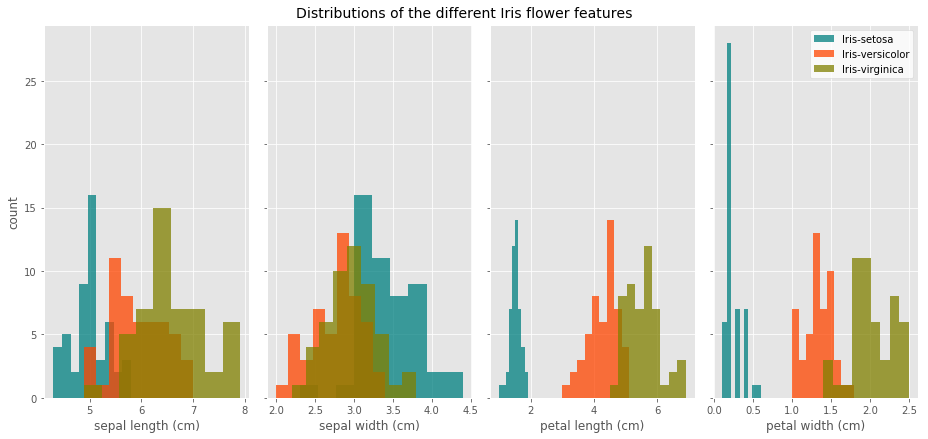

In [7]:
# create a 1-row 4-columns plot with common y axes and custom size
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(13, 6))
# plot title
fig.suptitle('Distributions of the different Iris flower features', y=1.01,
             fontsize=14)

for col in range(4):  # for a specific flower feature
    for key in colors:  # for a specific class color
        # draw a histogram for the feature with the relevant class color
        n, bins, patches = axes[col].hist(X[y == key, col],  # x values
                                          bins=9,  # number of bins
                                          color=colors[key],  # colors
                                          alpha=0.75,  # transparency
                                          label=key)  # plot labels
        axes[col].set_xlabel(labelsx[col])  # x-axis label
        axes[col].set_ylabel(labelsy[col])  # y-axis label

plt.legend(facecolor='white')  # plot legend
plt.tight_layout()  # use tight layout
plt.show()  # show plot

We can also use the **pandas.DataFrame.hist()** function to achieve the same results. **pandas.DataFrame.hist()** is actually just a wrapper for **matplotlib.pyplot.hist()**. Obviously there is no signifficant difference between the two functions in terms of code readability or difficulty of implementation, but the pandas function may be faster (needs checking with more data).

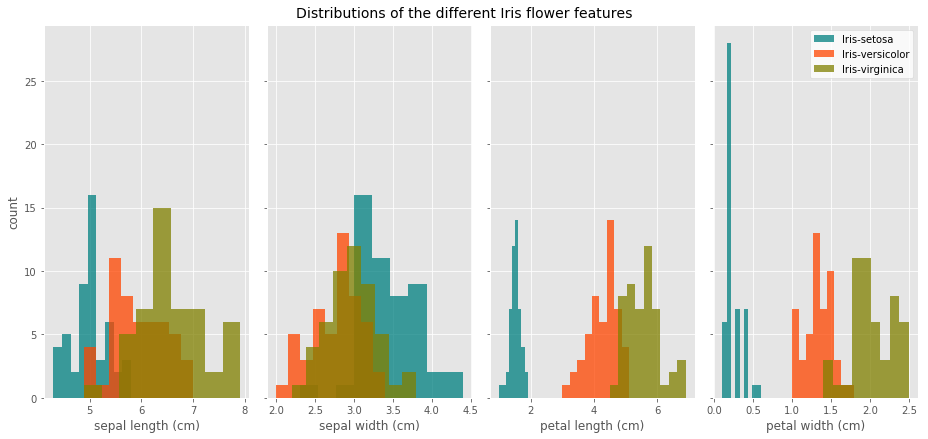

In [8]:
# create a 1-row 4-columns plot with common y axes and custom size
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(13, 6))
# plot title
fig.suptitle('Distributions of the different Iris flower features', y=1.01,
             fontsize=14)

for col in range(4):  # for a specific flower feature
    for key in colors:  # for a specific class color
        # draw a histogram for the feature with the relevant class color
        ax = df.iloc[:, col][df['class'] == key].hist(bins=9,  # number of bins
                                                      # colors
                                                      color=colors[key],
                                                      alpha=0.75,  # transparency
                                                      # in which figure column to plot
                                                      ax=axes[col],
                                                      label=key)  # plot labels
    ax.set_xlabel(labelsx[col])  # x-axis label
    ax.set_ylabel(labelsy[col])  # y-axis label

plt.legend(facecolor='white')  # plot legend
plt.tight_layout()  # use tight layout
plt.show()  # show plot

As one can already see, in the first two plots there is an overlapping of the three classes of flowers, whereas in the last two plots there is a clear separation of the Iris-setosa class.

Another useful function, which can be used for a quick visualization of the data clustering, is the **pandas.plotting.parallel_coordinates()** function.

In [9]:
from pandas.plotting import parallel_coordinates

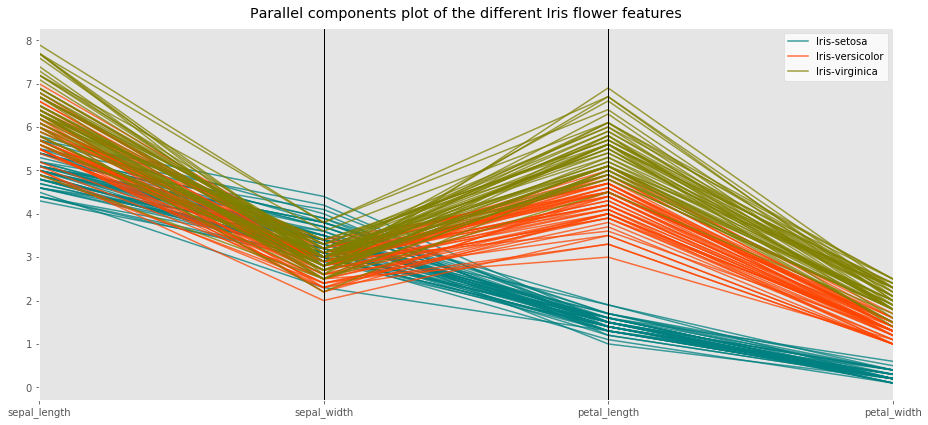

In [10]:
plt.figure(figsize=(13, 6))  # create figure and set size
# apply parallel_coordinates()
ax = parallel_coordinates(df, 'class',  # dataframe, class to plot
                          cols=['sepal_length', 'sepal_width',  # columns to plot
                                'petal_length', 'petal_width'],
                          color=[colors[key] for key in colors],  # colors
                          alpha=0.75)  # transparency

# plot title
plt.title('Parallel components plot of the different Iris flower features',
          y=1.01)
plt.legend(facecolor='white')  # plot legend
plt.tight_layout()  # use tight layout
plt.show()  # show plot

### Data Standardization 

From scikit-learn [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html): Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). More examples and python code on standardization can be found [here](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#standardization-and-min-max-scaling).

We will implement standard scaling using the **sklearn.preprocessing.StandardScaler().fit_transform()** function on the $\mathbf{X}$ matrix data.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# transform array data onto unit scale (mean = 0 and variance = 1)
X_std = StandardScaler().fit_transform(X)
X_std[0:5, :]  # show first 5 rows

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

Just for demonstrating, we will implement the same standardization as above, but, this time, on the dataframe data.

In [13]:
# transform dataframe data onto unit scale (mean = 0 and variance = 1)
df_std = StandardScaler().fit_transform(df.iloc[:, 0:4])
df_std[0:5]  # show first 5 rows

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

## 2. Calculation of eigenvalues and eigenvectors (eigendecomposition)

The calculation of the eigenvalues and eigenvectors is the most important step in PCA, since the eigenvectors define the direction of the new $k$-dimensional space and the eigenvalues define their magnitude. In other words, the eigenvalues explain the variance of the data along the new features axes.

### Covariance matrix

In probability theory and statistics, covariance is a measure of the joint variability of two random variables. If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, i.e., the variables tend to show similar behavior, the covariance is positive. In the opposite case the covariance is negative.

The [sample covariance matrix](https://en.wikipedia.org/wiki/Sample_mean_and_covariance) is a $d \times d$ matrix $\mathbf{Q} = [q_{jk}]$ with entries
$$
q_{jk} = \frac{1}{n-1} \sum\limits_{i=1}^{n} (x_{ij} - \bar{x}_{j}) (x_{ik} - \bar{x}_{k}),
$$
where $q_{jk}$ is an estimate of the covariance between the $j$-th variable and the $k$-th variable of the population underlying the data, $n$ is the number of observations and $x_{ij}$, $x_{ik}$ denote the $i$-th independently drawn observation ($i=1,\dots,n$) on the $j$-th and $k$-th random variable ($j,k=1,\dots,d$), respectively. $\bar{x}_j$, $\bar{x}_k$ are the average values of the $n$ observations of the $j$-th and $k$-th variables. They, also, are the $j$-th and $k$-th elements of the sample mean vector $\mathbf{\bar{x}}$ and are given by
$$
\bar{x}_j = \frac{1}{n} \sum\limits_{i=1}^{n} x_{ij}
$$
(similarly for $\bar{x}_k$).

The sample mean vector $\mathbf{\bar{x}}$ is a $d \times 1$ vector that contains the average of the observations for each variable and is given by
$$
\mathbf{\bar{x}} = \frac{1}{n} \sum\limits_{i=1}^{n} \mathbf{x_{i}} =
\begin{bmatrix} 
\bar{x}_1 \\
\vdots \\
\bar{x}_j \\
\vdots \\
\bar{x}_d \\
\end{bmatrix}
$$

For a matrix $\mathbf{F}$ with the variables arranged in $d$ columns, each of $n$ observations, the sample covariance matrix can be computed as
$$
\mathbf{Q} = \frac{1}{n-1} (\mathbf{F} - \mathbf{\bar{x}} \mathbf{1}_n^{\mathrm{T}}) (\mathbf{F} - \mathbf{\bar{x}} \mathbf{1}_n^{\mathrm{T}})^{\mathrm{T}},
$$
where $\mathbf{1}_n$ is an $n \times 1$ vector of ones.

If the variables are arranged in columns, as is our case, so $\mathbf{\bar{x}}$ is now a $1 \times d$ row vector and $\mathbf{M} = \mathbf{F}^{\mathrm{T}}$ is an $n \times d$ matrix, the sample covariance matrix is given by
$$
\mathbf{Q} = \frac{1}{n-1} (\mathbf{M} - \mathbf{\bar{x}} \mathbf{1}_n)^{\mathrm{T}} (\mathbf{F} - \mathbf{\bar{x}} \mathbf{1}_n).
$$

In [14]:
import numpy as np

In [15]:
mean_vec = np.mean(X_std, axis=0)  # mean value of each column (axis=0)

# calculate and print the covariance matrix
cov_mat = (X_std - mean_vec).T.dot(X_std - mean_vec) / (X_std.shape[0] - 1)
print('Covariance matrix:\n', cov_mat)

Covariance matrix:
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


An easier way to calculate the covariance matrix is by using the **numpy.cov()** function. According to the function's [documentation](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.cov.html), each row of the matrix represents a variable, and each column a single observation of all those variables. So we have to use the transpose of `X_std`, since, in our case, the variables are represented by the columns of the matrix. The same holds for other numpy's functions that use matrix calculations.

In [16]:
# calculate and print the covariance matrix
cov_mat = np.cov(X_std.T)
print('Numpy Covariance matrix:\n', cov_mat)

Numpy Covariance matrix:
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


Now, we can calculate the eigenvalues and eigenvectors of the covariance matrix using the **np.linalg.eig()** function. The eigenvectors are the columns of the eigenvector array.

In [17]:
# calculate and print the eigenvalues and eigenvectors
evals, evecs = np.linalg.eig(cov_mat)
print('Eigenvalues:\n', evals)
print('\nEigenvectors:\n', evecs)

Eigenvalues:
 [ 2.93035378  0.92740362  0.14834223  0.02074601]

Eigenvectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


### Correlation matrix

The [correlation](https://en.wikipedia.org/wiki/Correlation_and_dependence) is just the normalized covariance, so for two random variables $X$, $Y$ it is
$$
\text{cor}(X, Y) = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y},
$$
where $\sigma_X$, $\sigma_Y$ are the standard deviations of the variables $X$ and $Y$, respectively.

It is clear from the above that the correlation matrix, computed by the **numpy.corcoef()** function yields exactly the same eigenvalues and eigenvectors as the covariance matrix.

In [18]:
# calculate and print the correlation matrix
cor_mat1 = np.corrcoef(X_std.T)
print('Correlation matrix:\n', cor_mat1)

Correlation matrix:
 [[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


In [19]:
# calculate and print the eigenvalues and eigenvectors
evals1, evecs1 = np.linalg.eig(cor_mat1)
print('Eigenvalues:\n', evals1)
print('\nEigenvectors:\n', evecs1)

Eigenvalues:
 [ 2.91081808  0.92122093  0.14735328  0.02060771]

Eigenvectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


We can also use the data before the standardization to compute the correlation matrix, since the computation includes standardization.

In [20]:
# calculate and print the correlation matrix
cor_mat2 = np.corrcoef(X.T)
print('Correlation matrix:\n', cor_mat2)

Correlation matrix:
 [[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


In [21]:
# calculate and print the eigenvalues and eigenvectors
evals2, evecs2 = np.linalg.eig(cor_mat2)
print('Eigenvalues:\n', evals2)
print('\nEigenvectors:\n', evecs2)

Eigenvalues:
 [ 2.91081808  0.92122093  0.14735328  0.02060771]

Eigenvectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


As we can see, both correlation matrix calculations yield exactly the same results and the eigenvectors are identical to the ones obtained through the covariance matrix, as expected. The eigenvalues on the other hand are slightly different, yet if we take the normalized eigenvalues we can clearly see that they are exactly the same.

In [22]:
print('Normalized covariance matrix eigenvalues:\n', evals / sum(evals))
print('\nNormalized correlation matrix eigenvalues:\n', evals1 / sum(evals1))

Normalized covariance matrix eigenvalues:
 [ 0.72770452  0.23030523  0.03683832  0.00515193]

Normalized correlation matrix eigenvalues:
 [ 0.72770452  0.23030523  0.03683832  0.00515193]


### Singular-value decomposition

Although it's easy to perform eigendecompostition using the covariance or correlation matrix, singular-value decomposition (SVD) is prefered for most PCA applications, due to its computational efficiency. SVD is performed using the **np.linalg.svd()** function and results in a $\mathbf{U \Sigma V^{*}}$ matrix, where $\mathbf{U}$ is an $m \times m$ real or complex unitary matrix, $\mathbf{\Sigma }$ is an $m \times n$ rectangular diagonal matrix with non-negative real numbers on the diagonal, and $\mathbf {V}$ is an $n \times n$ real or complex unitary matrix. 

The eigenvectors are the values of $\mathbf{U}$ matrix and their corresponding eigenvalues are given by the equation
$$
\lambda_{i} = \frac{\sigma_{i}^{2}}{n - 1},
$$
where $\sigma_{i}$ are the diagonal values of the $\mathbf{\Sigma}$ matrix and $n$ is the number of observations.

Notice that some of the eigenvectors (columns) given by the SVD are of opposite sign to those of the other techniques, but still are valid, since if $e$ is an eigenvector then every multiple of $e$ is also an eigenvector.

In [23]:
u, s, v = np.linalg.svd(X_std.T)
evals_svd = s**2 / (X_std.shape[0])  # calculate the eigenvalues

print('SVD eigenvectors:\n', u)
print('\nSVD eigenvalues:\n', evals_svd)
print('\nNormalized SVD eigenvalues:\n', evals_svd / sum(evals_svd))

SVD eigenvectors:
 [[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]

SVD eigenvalues:
 [ 2.91081808  0.92122093  0.14735328  0.02060771]

Normalized SVD eigenvalues:
 [ 0.72770452  0.23030523  0.03683832  0.00515193]


## 3. Principal components selection

The purpose of PCA is to reduce the dimensionality of the original $d$-dimensional feature space by projecting it onto a smaller $k$-dimensional subspace. In this subspace, the axes's directions are defined by the eigenvectors.

The eigenvectors obtained with the methods we described above are of unit length, which can be confirmed using the **np.testing.assert_almost_equal()** and **np.linalg.norm()** functions.

In [24]:
for ev in evecs:
    np.testing.assert_almost_equal(1, np.linalg.norm(ev))
print('OK.')

OK.


Another way to show that the eigenvectors are of unit length:

In [25]:
for i in range(evecs.shape[1]):
    evecsum = sum(evecs[:, i]**2)
    print('Eigenvector{:d} = {:.5f}'.format(i, evecsum))

Eigenvector0 = 1.00000
Eigenvector1 = 1.00000
Eigenvector2 = 1.00000
Eigenvector3 = 1.00000


In order to reduce the dimensionality of the original feature space we have to decide which eigenvectors to keep and which to drop. The $k$ eigenvectors with the highest eigenvalues hold most of the information of the original feature space and are the ones we want to keep. The rest can be dropped.

So, the first thing to do is to sort the eigenvalues and their corresponding eigenvectors in descending order.

In [26]:
# list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(evals[i]), evecs[:, i]) for i in range(len(evals))]

# sort (eigenvalue, eigenvector) tuples in descending order
eig_pairs.sort()  # sort in ascending order
eig_pairs.reverse()  # reverse sort order

# show the eigenvalue-eigenvector pairs and confirm that they are in
# descending order
for i in range(len(eig_pairs)):
    print('Eval{:d}: {:.10f}\tEvec{:d}: {}'.format(
        i, eig_pairs[i][0], i, eig_pairs[i][1]))

Eval0: 2.9303537756	Evec0: [ 0.52237162 -0.26335492  0.58125401  0.56561105]
Eval1: 0.9274036215	Evec1: [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
Eval2: 0.1483422265	Evec2: [-0.72101681  0.24203288  0.14089226  0.6338014 ]
Eval3: 0.0207460140	Evec3: [ 0.26199559 -0.12413481 -0.80115427  0.52354627]


Next, we use the eigenvalues to calculate the *explained variance* of the principal components, in order to decide how many to keep. The explained variance is a measure of how much information (variance) can be attributed to each principal component.

To make things more conceivable, we will draw the explained variance of each principal component and the cumulative explained variance on the same plot. 

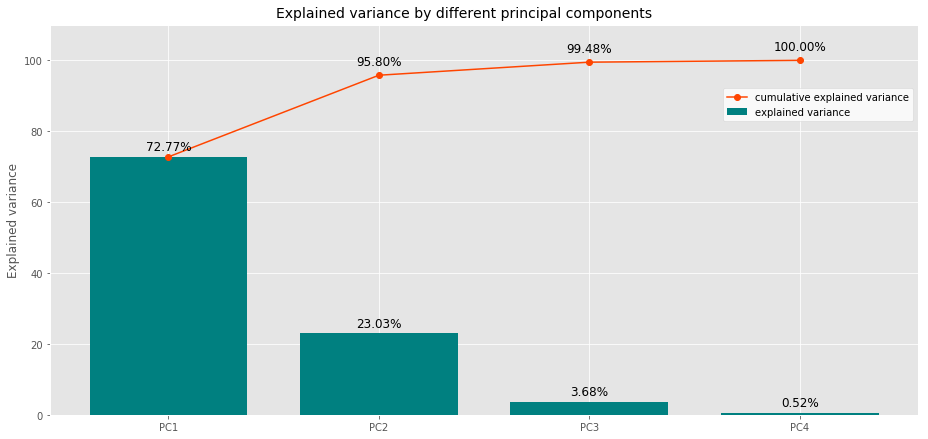

In [27]:
tot = sum(evals)  # total eigenvalues sum
# calculation of explained variance for each of the eigenvalues
exp_var = [(i / tot * 100) for i in sorted(evals, reverse=True)]
# cumulative sum of the explained variance
cum_exp_var = np.cumsum(exp_var)

fig, ax = plt.subplots(figsize=(13, 6))  # create figure and set its size
# plot title
fig.suptitle('Explained variance by different principal components',
             y=1.01, fontsize=14)

x = [i for i in range(len(evals))]  # x-axis values

# bar plot
bar = ax.bar(x, exp_var,  # x-y values
             color='teal',  # color
             width=0.75,  # bar width
             label='explained variance')  # plot label
# line plot
line = ax.plot(x, cum_exp_var,  # x-y values
               color='orangered',  # color
               marker='o',  # marker style
               label='cumulative explained variance')  # plot label

ax.set_ylabel('Explained variance')  # y-axis label
ax.set_xticks(x)  # x-axis ticks in defined positions
# manual x-axis labels in the above-defined positions
ax.set_xticklabels(['PC{:d}'.format(i + 1) for i in range(len(evals))])

# text over bars
for rect in bar:
    height = rect.get_height()  # bar height
    width = rect.get_width()  # bar width
    pos = rect.get_x()  # bar position
    ax.text(pos + width / 2, height + 1,  # x-y coordinates
            '{:.2f}%'.format(height),  # text and formatting
            ha='center',  # horizontal alignment
            va='bottom',  # vertical alignment
            fontsize=12)  # font size
# text over line-points
for i in range(1, len(cum_exp_var)):
    ax.text(x[i], cum_exp_var[i] + 2,  # x-y coordinates
            '{:.2f}%'.format(cum_exp_var[i]),  # text and formatting
            ha='center',  # horizontal alignment
            va='bottom',  # vertical alignment
            fontsize=12)  # font size

plt.ylim(0, 110)  # y-axis limits
plt.legend(facecolor='white', bbox_to_anchor=(1.0, 0.85))  # plot legend
plt.tight_layout()  # use tight layout
plt.show()  # show plot

It is clear from the above that PC1 and PC2 explain more than 95% of the variance and, thus, contain most of the information. The other two principal components can be safely dropped, without losing much information.

## 4. Projection matrix construction

The projection matrix $\mathbf{W}$ is $d \times k$ matrix constructed by the eigenvectors of the $k$ principal components we decide to keep. In our case, we are keeping only the first 2 principal components, thus reducing the original $4$-dimensional original space to a $2$-dimensional one, which leads to a $4 \times 2$ projection matrix.

In [28]:
# calculate and print the projection matrix
w = np.stack((eig_pairs[0][1],
              eig_pairs[1][1]), axis=1)
print('Matrix W:\n', w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


## 5. Projection onto the new feature space

The last step is to use the $4 \times 2$ matrix $\mathbf{W}$ to transform the original feature space to the reduced feature space by using the equation
$$
\mathbf{Y} = \mathbf{X} \cdot \mathbf{W},
$$
where  $\mathbf{Y}$ is the $150 \times 2$ matrix of the reduced feature space.

In [29]:
Y = np.dot(X_std, w)  # create Y matrix
# convert Y to pandas dataframe for better visualization
Y_df = pd.DataFrame(Y, columns=['PC1', 'PC2'])
Y_df.head()  # print head of Y_df

,PC1,PC2
0,-2.264542,-0.505704
1,-2.086426,0.655405
2,-2.367950,0.318477
3,-2.304197,0.575368
4,-2.388777,-0.674767


Finally, we plot the selected principal components to have a visualization of the classes' clustering.

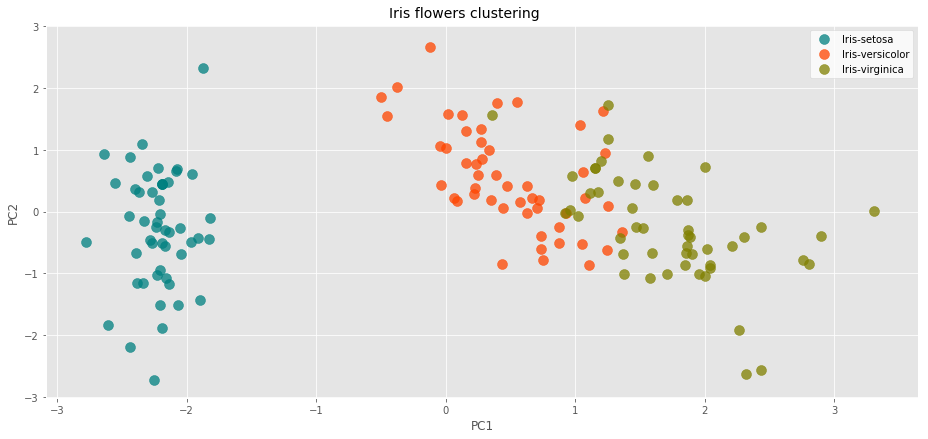

In [30]:
fig, ax = plt.subplots(figsize=(13, 6))  # create figure and set its size
# plot title
fig.suptitle('Iris flowers clustering', y=1.01, fontsize=14)

for key in colors:
    plt.scatter(Y[y == key, 0], Y[y == key, 1],  # x-y values
                s=100,  # marker size
                c=colors[key],  # color
                alpha=0.75,  # transparency
                label=key)  # plot label

ax.set_xlabel('PC1')  # x-axis label
ax.set_ylabel('PC2')  # y-axis label
# ax.set_title('Iris flowers clustering')  # plot title

plt.legend(facecolor='white')  # plot legend
plt.tight_layout()  # use tight layout
plt.show()  # show plot

## PCA with scikit-learn

Luckily, we can avoid all this tedious procedure by using the **sklearn.decomposition.PCA()** function.

In [31]:
from sklearn.decomposition import PCA as sklearnPCA

In [32]:
# choose number of components to keep
sklearn_pca = sklearnPCA(n_components=2)
# transform original feature space to reduced feature space
Y_sklearn = sklearn_pca.fit_transform(X_std)
# convert Y_sklearn to pandas dataframe for better visualization
Y_sklearn_df = pd.DataFrame(Y_sklearn, columns=['PC1', 'PC2'])
Y_sklearn_df.head()  # print head of Y_sklearn_df

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [33]:
Y_sklearn

array([[ -2.26454173e+00,   5.05703903e-01],
       [ -2.08642550e+00,  -6.55404729e-01],
       [ -2.36795045e+00,  -3.18477311e-01],
       [ -2.30419716e+00,  -5.75367713e-01],
       [ -2.38877749e+00,   6.74767397e-01],
       [ -2.07053681e+00,   1.51854856e+00],
       [ -2.44571134e+00,   7.45626750e-02],
       [ -2.23384186e+00,   2.47613932e-01],
       [ -2.34195768e+00,  -1.09514636e+00],
       [ -2.18867576e+00,  -4.48629048e-01],
       [ -2.16348656e+00,   1.07059558e+00],
       [ -2.32737775e+00,   1.58587455e-01],
       [ -2.22408272e+00,  -7.09118158e-01],
       [ -2.63971626e+00,  -9.38281982e-01],
       [ -2.19229151e+00,   1.88997851e+00],
       [ -2.25146521e+00,   2.72237108e+00],
       [ -2.20275048e+00,   1.51375028e+00],
       [ -2.19017916e+00,   5.14304308e-01],
       [ -1.89407429e+00,   1.43111071e+00],
       [ -2.33994907e+00,   1.15803343e+00],
       [ -1.91455639e+00,   4.30465163e-01],
       [ -2.20464540e+00,   9.52457317e-01],
       [ -

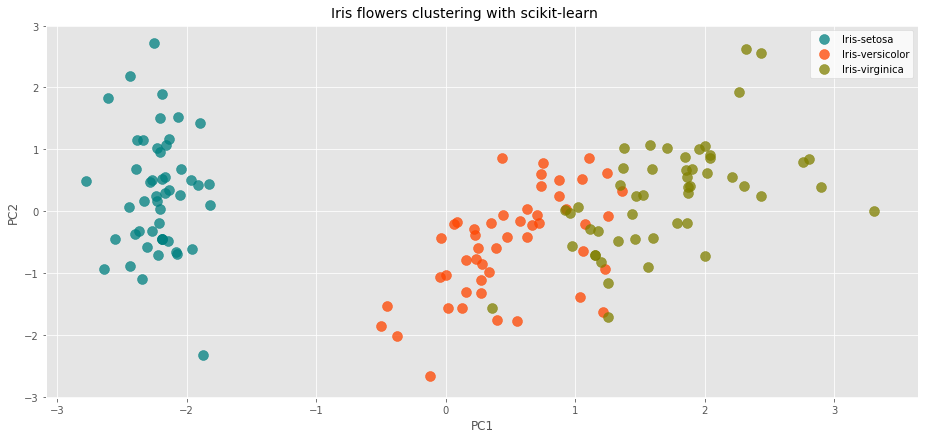

In [34]:
fig, ax = plt.subplots(figsize=(13, 6))  # create figure and set its size
# plot title
fig.suptitle('Iris flowers clustering with scikit-learn',
             y=1.01,  # y offset
             fontsize=14)  # font size

for key in colors:
    plt.scatter(Y_sklearn[y == key, 0], Y_sklearn[y == key, 1],  # x-y values
                s=100,  # marker size
                c=colors[key],  # color
                alpha=0.75,  # transparency
                label=key)  # plot label

ax.set_xlabel('PC1')  # x-axis label
ax.set_ylabel('PC2')  # y-axis label

plt.legend(facecolor='white')  # plot legend
plt.tight_layout()  # use tight layout
plt.show()  # show plot

Comparing the two clustering plots we see that the second plot is upside-down with regards to the first. 
In the first plot we used the eigenvectors obtained from the covariance matrix, whereas in the second plot we used the scikit-learn PCA eigenvectors.

We can have a look at the scikit-learn PCA eigenvectors using the **components_** attribute and compare to the corresponding ones of the covariance matrix used in the first plot and the ones obtained through SVD.

In [35]:
print('scikit-learn:')
for i in range(2):
    print('Eigenvector{:d}:\t{}'.format(i, sklearn_pca.components_[i]))

print('\nCovariance matrix:')
for i in range(2):
    print('Eigenvector{:d}:\t{}'.format(i, evecs[:, i]))

print('\nSVD:')
for i in range(2):
    print('Eigenvector{:d}:\t{}'.format(i, u[:, i]))

scikit-learn:
Eigenvector0:	[ 0.52237162 -0.26335492  0.58125401  0.56561105]
Eigenvector1:	[ 0.37231836  0.92555649  0.02109478  0.06541577]

Covariance matrix:
Eigenvector0:	[ 0.52237162 -0.26335492  0.58125401  0.56561105]
Eigenvector1:	[-0.37231836 -0.92555649 -0.02109478 -0.06541577]

SVD:
Eigenvector0:	[-0.52237162  0.26335492 -0.58125401 -0.56561105]
Eigenvector1:	[-0.37231836 -0.92555649 -0.02109478 -0.06541577]


It is clear that the method we follow to compute the eigenvectors may lead to eigenvectors with different signs. Nevertheless, in all cases the eigenvectors obtained are valid.

The difference between the two plots can be explained by this fact and it's worth noting that it only affects the visual representation of the data and not the clustering itself, which is the main reason to implement a PCA.